## About Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [2]:
df = pd.read_csv("udemy_courses.csv")
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [4]:
df.shape

(3678, 12)

In [5]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [6]:
df.describe(include="O")

,course_title,url,level,published_timestamp,subject
count,3678,3678,3678,3678,3678
unique,3663,3672,4,3672,4
top,Acoustic Blues Guitar Lessons,https://www.udemy.com/cfa-level-2-quantitative...,All Levels,2017-07-02T14:29:35Z,Web Development
freq,3,2,1929,2,1200


In [7]:
df['date'] = pd.to_datetime(df['published_timestamp'])
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,date
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,2017-01-18 20:58:58+00:00
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,2017-03-09 16:34:20+00:00
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,2016-12-19 19:26:30+00:00
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,2017-05-30 20:07:24+00:00
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,2016-12-13 14:57:18+00:00


## Analysis

In [20]:
fig = px.histogram(df, x= 'price', title='Prices of UDEMY Courses')

fig.show()

UDEMY has 310 free course and it's 295 courses are priced as $200 . As we expected, there is highly right skewed distribution

In [21]:
fig = px.histogram(df, x= 'num_subscribers', title='Number of Subscribers of UDEMY Courses')

fig.show()

Number of subscribers ranges from 0 to 268923, highly skewed distribution.

In [22]:
fig = px.histogram(df, x= 'num_reviews', title='Number of Reviews of UDEMY Courses')

fig.show()

In [23]:
fig = px.histogram(df, x= 'num_lectures', title='Number of Lectures of UDEMY Courses')

fig.show()

20-45 range has a lot of courses, highly skewed data with outliers.

In [24]:
fig = px.histogram(df, x= 'content_duration', title='Durations of UDEMY Courses')

fig.show()

0-3 hours range has a lot of courses. But as we have mentioned before and easily seen in the histogram, we have highly sekwed data with outliers.

In [25]:
df.drop(["url","level","course_title","published_timestamp","subject"], axis=1).corr()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,date
course_id,1.000000,-0.013679,0.142319,-0.167856,-0.058550,-0.024646,-0.057223,0.956872
is_paid,-0.013679,1.000000,0.328513,-0.266159,-0.087471,0.112574,0.094417,-0.010122
price,0.142319,0.328513,1.000000,0.050769,0.113696,0.330160,0.293450,0.148524
num_subscribers,-0.167856,-0.266159,0.050769,1.000000,0.649946,0.157746,0.161839,-0.188543
num_reviews,-0.058550,-0.087471,0.113696,0.649946,1.000000,0.243029,0.228889,-0.053969
num_lectures,-0.024646,0.112574,0.330160,0.157746,0.243029,1.000000,0.801647,-0.018381
content_duration,-0.057223,0.094417,0.293450,0.161839,0.228889,0.801647,1.000000,-0.056105
date,0.956872,-0.010122,0.148524,-0.188543,-0.053969,-0.018381,-0.056105,1.000000


<Axes: >

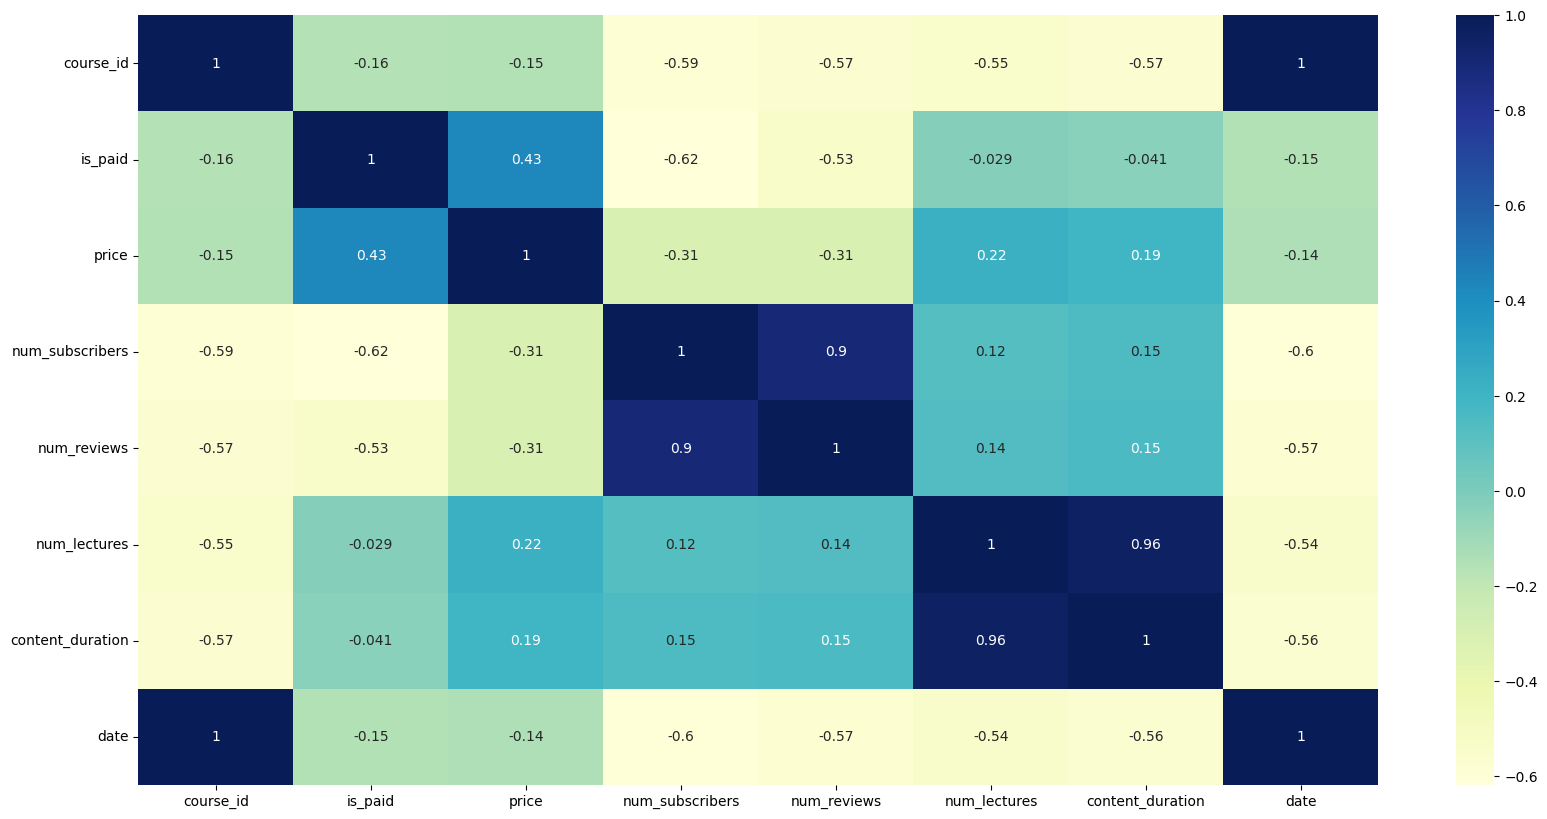

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
new_df = df.drop(["url","level","course_title","published_timestamp","subject"], axis=1).corr()
sns.heatmap(new_df.corr(), ax=ax, annot=True, cmap='YlGnBu')

Based on the results:

- There is positive but not so strong relationship between number of reviews and number of subscribers
- Also there is positive and almost strong (.80) relationship between number of lectures in the course and the duration of the course.

In [27]:
np.round(df['subject'].value_counts(normalize=True),2)

subject
Web Development        0.33
Business Finance       0.32
Musical Instruments    0.18
Graphic Design         0.16
Name: proportion, dtype: float64

- Overall 33% of the Udemy Courses are from Web Development and 32% of the Udemy Courses are from Business Finance area.
- Courses on Business Finance and Web Development subjects covers almost 2 out of 3 course selection.

In [28]:
fig = px.histogram(df, x="subject", title='Course Count by Subject')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [29]:
np.round(df['level'].value_counts(normalize=True),2)

level
All Levels            0.52
Beginner Level        0.35
Intermediate Level    0.11
Expert Level          0.02
Name: proportion, dtype: float64

- Overall 52% of the Udemy Courses contains information for all levels of the learner.
- Beginner level courses make up 35% of all of the courses
- 1 out of 10 courses offered by UDEMY is in the intermediate level.
- Only 2 out of 100 courses offered by UDEMY appeal to advance or exper level learners.

In [30]:
fig = px.histogram(df, x="level", title='Course Count by Level of Courses')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [35]:
top_15_paid_courses = df[df['price']!=0][['course_title','subject','num_subscribers']].sort_values(by= 'num_subscribers',ascending=False).head(15)
top_15_paid_courses

,course_title,subject,num_subscribers
3230,The Web Developer Bootcamp,Web Development,121584
3232,The Complete Web Developer Course 2.0,Web Development,114512
2619,Learn Javascript & JQuery From Scratch,Web Development,84897
3247,JavaScript: Understanding the Weird Parts,Web Development,79612
1979,Pianoforall - Incredible New Way To Learn Pian...,Musical Instruments,75499
3204,Angular 4 (formerly Angular 2) - The Complete ...,Web Development,73783
2701,Become a Web Developer from Scratch,Web Development,69186
3246,Learn and Understand AngularJS,Web Development,59361
3251,Learn and Understand NodeJS,Web Development,58208
2662,The Complete HTML & CSS Course - From Novice T...,Web Development,57422


In [36]:
fig = px.bar(top_15_paid_courses, y= 'num_subscribers', x='course_title', hover_data = top_15_paid_courses[['subject']], color='subject')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Almost all of the top 15 paid courses are from Web Development area, except one course in Musical Instruments area.

In [38]:
top_15_free_courses = df[df['price']==0][['course_title','subject','num_subscribers']].sort_values(by= 'num_subscribers',ascending=False).head(15)
top_15_free_courses

,course_title,subject,num_subscribers
2827,Learn HTML5 Programming From Scratch,Web Development,268923
3032,Coding for Entrepreneurs Basic,Web Development,161029
2783,Build Your First Website in 1 Week with HTML5 ...,Web Development,120291
1896,Free Beginner Electric Guitar Lessons,Musical Instruments,101154
2589,Web Design for Web Developers: Build Beautiful...,Web Development,98867
3289,Practical PHP: Master the Basics and Code Dyna...,Web Development,83737
3665,Beginner Photoshop to HTML5 and CSS3,Web Development,73110
2782,Web Development By Doing: HTML / CSS From Scratch,Web Development,72932
3325,HTML and CSS for Beginners - Build a Website &...,Web Development,70773
492,Bitcoin or How I Learned to Stop Worrying and ...,Business Finance,65576


In [40]:
fig = px.bar(top_15_free_courses, y= 'num_subscribers', x='course_title', hover_data = top_15_free_courses[['subject']], color='subject')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Top 15 free courses are mostly from Web Development area, but also include other subjects areas.

In [42]:
top_15_reviewed = df[['course_title','subject','is_paid','num_reviews']].sort_values(by='num_reviews', ascending=False).head(15)
top_15_reviewed

,course_title,subject,is_paid,num_reviews
3230,The Web Developer Bootcamp,Web Development,True,27445
3232,The Complete Web Developer Course 2.0,Web Development,True,22412
3204,Angular 4 (formerly Angular 2) - The Complete ...,Web Development,True,19649
3247,JavaScript: Understanding the Weird Parts,Web Development,True,16976
3254,Modern React with Redux,Web Development,True,15117
3246,Learn and Understand AngularJS,Web Development,True,11580
3251,Learn and Understand NodeJS,Web Development,True,11123
2827,Learn HTML5 Programming From Scratch,Web Development,False,8629
3228,Angular 2 with TypeScript for Beginners: The P...,Web Development,True,8341
1979,Pianoforall - Incredible New Way To Learn Pian...,Musical Instruments,True,7676


In [43]:
fig = px.bar(top_15_reviewed , y= 'num_reviews', x='course_title', hover_data = top_15_reviewed[['subject', 'is_paid']], color='subject')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Top 15 reviewed courses are from Web Development area, except one course. And 11 out of 15 top reviewed courses are paid courses.

In [44]:
top_15_price = df[['course_title','subject','num_subscribers', 'price']].sort_values(by=['price','num_subscribers'], ascending=False).head(15)

top_15_price

,course_title,subject,num_subscribers,price
3230,The Web Developer Bootcamp,Web Development,121584,200
3232,The Complete Web Developer Course 2.0,Web Development,114512,200
1979,Pianoforall - Incredible New Way To Learn Pian...,Musical Instruments,75499,200
1213,Photoshop for Entrepreneurs - Design 11 Practi...,Graphic Design,36288,200
3233,Ultimate Web Designer & Developer Course: Buil...,Web Development,33788,200
3206,PHP for Beginners -Become a PHP Master - Proje...,Web Development,28880,200
2621,The Ultimate Web Developer How To Guide,Web Development,24861,200
1526,How To Make Graphics For A Website,Graphic Design,24857,200
3117,1 Hour JavaScript,Web Development,22999,200
2755,Become A Web Developer And Seller - Build Webs...,Web Development,21730,200


In [45]:
fig = px.bar(top_15_price , y= 'num_subscribers', x='course_title', hover_data = top_15_price[['price']], color='subject')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Expensive courses are $ 200, and all of the subjects areas are in the top 15 expensive course list.

In [46]:
from wordcloud import WordCloud, STOPWORDS

# function draw cloud 
def draw_wordCloud(colName, df=df, stopwords=None, width=800, height=400):
    text_data = "".join(df[colName].dropna())
    # creating a wordcloud object
    wordcloud = WordCloud(width=width, height=height, background_color="white", stopwords=stopwords).generate(text_data)

    # display the figure 
    plt.figure(figsize=(10, 5), dpi=150)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

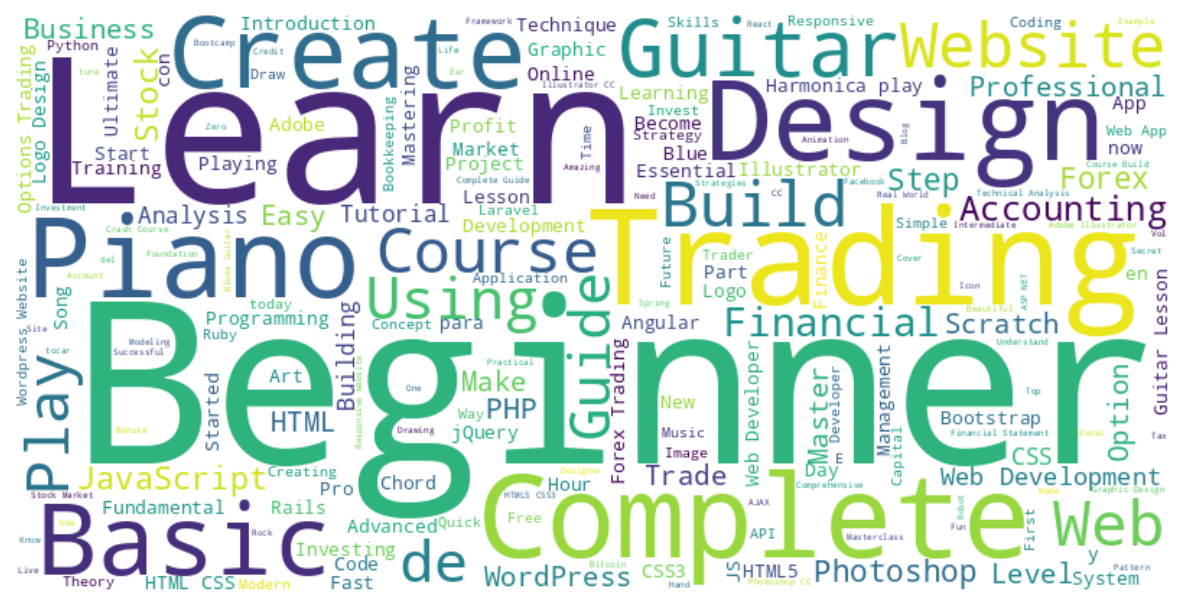

In [47]:
draw_wordCloud("course_title")

## Recommendation System

In [48]:
import neattext.functions as nfx
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel

In [49]:
df['clean_course_title']=df['course_title'].apply(nfx.remove_stopwords)
df['clean_course_title']=df['clean_course_title'].apply(nfx.remove_special_characters)
df.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,date,clean_course_title
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,2017-01-18 20:58:58+00:00,Ultimate Investment Banking Course
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,2017-03-09 16:34:20+00:00,Complete GST Course Certification Grow Practice


In [50]:
df[['course_title','clean_course_title']]


,course_title,clean_course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow You...,Complete GST Course Certification Grow Practice
2,Financial Modeling for Business Analysts and C...,Financial Modeling Business Analysts Consultants
3,Beginner to Pro - Financial Analysis in Excel ...,Beginner Pro Financial Analysis Excel 2017
4,How To Maximize Your Profits Trading Options,Maximize Profits Trading Options
...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,Learn jQuery Scratch Master JavaScript library
3674,How To Design A WordPress Website With No Codi...,Design WordPress Website Coding
3675,Learn and Build using Polymer,Learn Build Polymer
3676,CSS Animations: Create Amazing Effects on Your...,CSS Animations Create Amazing Effects Website


In [51]:
# text vectorization
count_vect=CountVectorizer()
cv_mat=count_vect.fit_transform(df['clean_course_title'])
cv_mat

<3678x3559 sparse matrix of type '<class 'numpy.int64'>'
	with 18333 stored elements in Compressed Sparse Row format>

In [52]:
cv_mat.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
df_cv_words = pd.DataFrame(cv_mat.todense(), columns=count_vect.get_feature_names_out())
df_cv_words.head(3)

,000005,001,01,02,10,100,101,101master,102,10k,...,zend,zero,zerotohero,zf2,zinsen,zoho,zombie,zu,zuhause,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#Cosine similarity matrix 
cosine_sim_mat=cosine_similarity(cv_mat)
cosine_sim_mat

array([[1.        , 0.20412415, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20412415, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.23570226],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.23570226, 0.        ,
        1.        ]])

In [55]:
# Get course id/index
course_indices=pd.Series(df.index,index=df['course_title']).drop_duplicates()
course_indices

course_title
Ultimate Investment Banking Course                                0
Complete GST Course & Certification - Grow Your CA Practice       1
Financial Modeling for Business Analysts and Consultants          2
Beginner to Pro - Financial Analysis in Excel 2017                3
How To Maximize Your Profits Trading Options                      4
                                                               ... 
Learn jQuery from Scratch - Master of JavaScript library       3673
How To Design A WordPress Website With No Coding At All        3674
Learn and Build using Polymer                                  3675
CSS Animations: Create Amazing Effects on Your Website         3676
Using MODX CMS to Build Websites: A Beginner's Guide           3677
Length: 3678, dtype: int64

In [56]:
idx=course_indices['How To Maximize Your Profits Trading Options']
idx

4

In [57]:
scores=list(enumerate(cosine_sim_mat[idx]))
scores

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 1.0),
 (5, 0.20412414523193154),
 (6, 0.20412414523193154),
 (7, 0.1889822365046136),
 (8, 0.3779644730092272),
 (9, 0.0),
 (10, 0.20412414523193154),
 (11, 0.5),
 (12, 0.0),
 (13, 0.17677669529663687),
 (14, 0.35355339059327373),
 (15, 0.0),
 (16, 0.0),
 (17, 0.1889822365046136),
 (18, 0.22360679774997896),
 (19, 0.0),
 (20, 0.30151134457776363),
 (21, 0.20412414523193154),
 (22, 0.1889822365046136),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.1889822365046136),
 (30, 0.35355339059327373),
 (31, 0.0),
 (32, 0.0),
 (33, 0.3779644730092272),
 (34, 0.0),
 (35, 0.3779644730092272),
 (36, 0.30151134457776363),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.5669467095138407),
 (44, 0.35355339059327373),
 (45, 0.0),
 (46, 0.35355339059327373),
 (47, 0.0),
 (48, 0.35355339059327373),
 (49, 0.4082482904638631),
 (50, 0.22360679774997896),
 (51, 0.0),
 (52, 0.1889822365046136),


In [58]:
sorted_scores=sorted(scores,key=lambda x:x[1],reverse=True)
sorted_scores[1:]

[(408, 0.5773502691896258),
 (43, 0.5669467095138407),
 (94, 0.5303300858899106),
 (136, 0.5303300858899106),
 (193, 0.5303300858899106),
 (442, 0.5303300858899106),
 (801, 0.5303300858899106),
 (11, 0.5),
 (59, 0.5),
 (68, 0.5),
 (71, 0.5),
 (95, 0.5),
 (328, 0.5),
 (376, 0.5),
 (512, 0.5),
 (645, 0.5),
 (736, 0.5),
 (944, 0.5),
 (987, 0.5),
 (809, 0.45226701686664544),
 (66, 0.4472135954999579),
 (220, 0.4472135954999579),
 (232, 0.4472135954999579),
 (367, 0.4472135954999579),
 (437, 0.4472135954999579),
 (461, 0.4472135954999579),
 (764, 0.4472135954999579),
 (827, 0.4472135954999579),
 (397, 0.4330127018922194),
 (49, 0.4082482904638631),
 (54, 0.4082482904638631),
 (72, 0.4082482904638631),
 (85, 0.4082482904638631),
 (105, 0.4082482904638631),
 (158, 0.4082482904638631),
 (165, 0.4082482904638631),
 (203, 0.4082482904638631),
 (293, 0.4082482904638631),
 (351, 0.4082482904638631),
 (400, 0.4082482904638631),
 (409, 0.4082482904638631),
 (800, 0.4082482904638631),
 (950, 0.408248

In [59]:
# selected coures indices
selected_course_indices=[i[0] for i in sorted_scores[1:]]
selected_course_indices

[408,
 43,
 94,
 136,
 193,
 442,
 801,
 11,
 59,
 68,
 71,
 95,
 328,
 376,
 512,
 645,
 736,
 944,
 987,
 809,
 66,
 220,
 232,
 367,
 437,
 461,
 764,
 827,
 397,
 49,
 54,
 72,
 85,
 105,
 158,
 165,
 203,
 293,
 351,
 400,
 409,
 800,
 950,
 953,
 998,
 8,
 33,
 35,
 100,
 107,
 111,
 155,
 184,
 361,
 432,
 508,
 648,
 796,
 897,
 14,
 30,
 44,
 46,
 48,
 75,
 89,
 147,
 151,
 198,
 344,
 359,
 364,
 375,
 414,
 449,
 469,
 564,
 626,
 706,
 792,
 861,
 906,
 951,
 960,
 1019,
 1108,
 1111,
 1130,
 1132,
 1137,
 1147,
 62,
 313,
 616,
 681,
 20,
 36,
 199,
 396,
 707,
 97,
 106,
 116,
 300,
 385,
 401,
 466,
 475,
 477,
 536,
 581,
 646,
 650,
 743,
 775,
 821,
 831,
 842,
 860,
 880,
 945,
 959,
 1001,
 1085,
 1167,
 254,
 67,
 77,
 78,
 84,
 88,
 133,
 142,
 162,
 206,
 282,
 297,
 318,
 348,
 354,
 392,
 406,
 427,
 446,
 491,
 498,
 531,
 557,
 568,
 596,
 692,
 694,
 762,
 767,
 813,
 918,
 1008,
 1017,
 1131,
 18,
 50,
 79,
 90,
 139,
 185,
 186,
 194,
 219,
 231,
 246,
 27

In [60]:
# selected coures scores
selected_course_scores=[i[1] for i in sorted_scores[1:]]

In [61]:
recommended_result=df['course_title'].iloc[selected_course_indices]
rec_df=pd.DataFrame(recommended_result)
rec_df['similarity_scores']=selected_course_scores
rec_df

,course_title,similarity_scores
408,Trading Options Basics,0.577350
43,Options Trading - How to Win with Weekly Options,0.566947
94,Intermediate Options trading concepts for Stoc...,0.530330
136,Forex Trading with Fixed 'Risk through Options...,0.530330
193,Trading Options For Consistent Returns: Option...,0.530330
...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,0.000000
3674,How To Design A WordPress Website With No Codi...,0.000000
3675,Learn and Build using Polymer,0.000000
3676,CSS Animations: Create Amazing Effects on Your...,0.000000


In [62]:
def recommend_course(title,num_of_rec=10):
    # ID for title
    idx = course_indices[title]
    # Course Indice
    # Search inside cosine_sim_mat
    scores = list(enumerate(cosine_sim_mat[idx]))
    # Scores
    # Sort Scores
    sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)
    # Recommend
    selected_course_indices = [i[0] for i in sorted_scores[1:]]
    selected_course_scores = [i[1] for i in sorted_scores[1:]]
    result = df['course_title'].iloc[selected_course_indices]
    rec_df = pd.DataFrame(result)
    rec_df['similarity_scores'] = selected_course_scores
    return rec_df.head(num_of_rec)

In [65]:
recommend_course('Trading Options Basics')

,course_title,similarity_scores
95,Options Trading 101: The Basics,0.866025
193,Trading Options For Consistent Returns: Option...,0.816497
861,Basics of Trading,0.816497
66,Options Trading Basics (3-Course Bundle),0.774597
800,Trading: Basics of Trading for Beginners,0.707107
953,Options Basics & Trading With Small Capital! -...,0.707107
43,Options Trading - How to Win with Weekly Options,0.654654
94,Intermediate Options trading concepts for Stoc...,0.612372
136,Forex Trading with Fixed 'Risk through Options...,0.612372
442,The Advantages of ETF Options and Index Option...,0.612372


## Model Building

In [68]:
# Split our dataset
from sklearn.model_selection import train_test_split
Xfeatures = df['clean_course_title']
ylabels = df['subject']
x_train,x_test,y_train,y_test = train_test_split(cv_mat,ylabels,test_size=0.3,random_state=42)

In [69]:
x_train.shape

(2574, 3559)

In [70]:
x_test.shape

(1104, 3559)

#### Logistic Regression

In [74]:
# Build Model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [75]:
# Acccuracy
lr_model.score(x_test,y_test)

0.9456521739130435

In [83]:
#model evaluation
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
y_pred = lr_model.predict(x_test)

# Confusion Matrix : true pos,false pos,etc
confusion_matrix(y_pred,y_test)

array([[379,  15,  16,   9],
       [  3, 145,   0,   1],
       [  0,   0, 170,   0],
       [  4,   8,   4, 350]], dtype=int64)

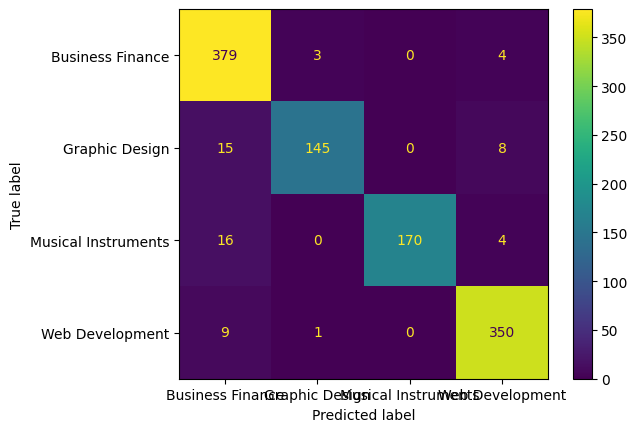

In [89]:
cm = confusion_matrix(y_test, y_pred, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot()
plt.show()

In [90]:
# Classification Report
print(classification_report(y_pred,y_test))

                     precision    recall  f1-score   support

   Business Finance       0.98      0.90      0.94       419
     Graphic Design       0.86      0.97      0.91       149
Musical Instruments       0.89      1.00      0.94       170
    Web Development       0.97      0.96      0.96       366

           accuracy                           0.95      1104
          macro avg       0.93      0.96      0.94      1104
       weighted avg       0.95      0.95      0.95      1104



#### KNN

In [92]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Training the KNN model
k = 5  # You can adjust the value of k as per your choice
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(x_train, y_train)

# Making predictions
y_pred = knn_model.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of KNN model:", accuracy)


Accuracy of KNN model: 0.6766304347826086


In [93]:
# Classification Report
print(classification_report(y_pred,y_test))

                     precision    recall  f1-score   support

   Business Finance       0.98      0.54      0.70       699
     Graphic Design       0.48      0.82      0.60        98
Musical Instruments       0.57      0.90      0.70       121
    Web Development       0.50      0.96      0.66       186

           accuracy                           0.68      1104
          macro avg       0.63      0.81      0.66      1104
       weighted avg       0.81      0.68      0.68      1104



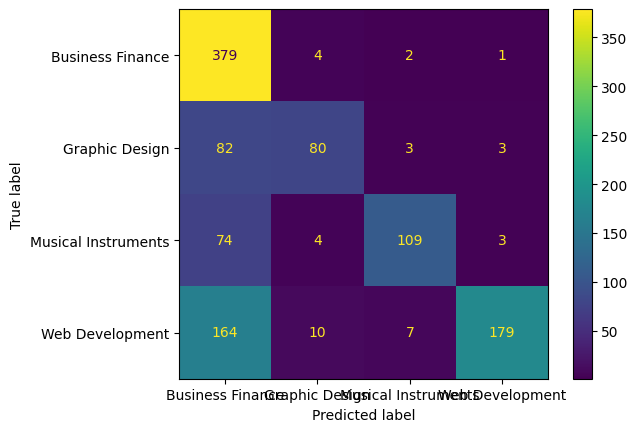

In [94]:
cm = confusion_matrix(y_test, y_pred, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot()
plt.show()

#### xyz